# Aula 1

### Parte 1

In [12]:
import pandas as pd

ratings_path = "F:/Git/data-science/aprendizado/datasets/ml-latest-small/ratings.csv"
notas = pd.read_csv(ratings_path)
notas.head() # mostra as 5 primeiras tuplas da tabela


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
notas.shape # mostra o formato da tabela no formato (qtd linhas, qtd colunas)

(100836, 4)

In [14]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] # o pandas tem o attr columns que permite que eu redefina os nomes das colunas
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
notas['nota'] # listando todos os valores da coluna 'notas'. Devolve um obj do tipo series

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [16]:
notas['nota'].unique() # apresenta todos os valores distintos da coluna notas

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [17]:
notas['nota'].value_counts() # apresenta a qtd de cada nota dada e já ordenou do mais frequente para o menos frequente

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [18]:
notas['nota'].mean() # média de todas as notas

3.501556983616962

### Parte 2

<AxesSubplot:ylabel='Frequency'>

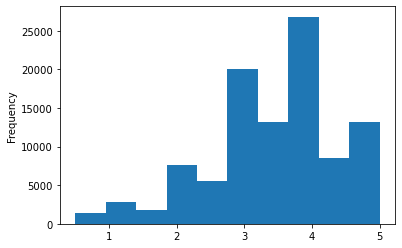

In [19]:
notas.nota.plot(kind='hist') # o método plot gera um gráfico base com os os dados. Ele aceita o parâmetro kind (tipo da visualização).
# o tipo hist gera um histograma
# é possível acessar a tabela como attr de um objeto com o operador .

In [20]:
notas.nota.median() # buscando a mediana das notas

3.5

In [21]:
notas.nota.describe() # apresenta uma série de descrições a respeito dos dados em questão. No caso, da coluna nota.

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

### Utilizando a biblioteca seaborn para gerar visualizações também

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

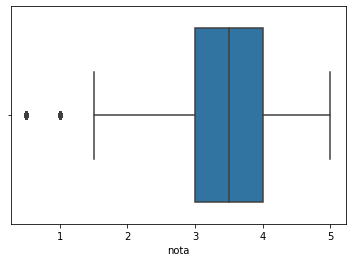

In [22]:
import seaborn as sns

sns.boxplot(notas.nota)

In [23]:
filmes_path = "F:/Git/data-science/aprendizado/datasets/ml-latest-small/movies.csv"
filmes = pd.read_csv(filmes_path)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
notas.query("filmeId==1") # É possível fazer queries/perguntas no pandas
# No caso, ele busca todas as informações relativas ao filme 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


### Analisando algumas notas específicas por filme

In [26]:
notas.query("filmeId==1").nota.mean() # Buscando a média das notas dadas ao filme 1

3.9209302325581397

In [27]:
notas.query("filmeId==2").nota.mean() # Media relativa ao filme 2

3.4318181818181817

In [28]:
grupo_notas_por_filme = notas.groupby("filmeId") # Agrupando pelas notas. Note que retorna um obj do tipo DataFrameGroupBy
grupo_notas_por_filme

In [29]:
medias_por_filme = grupo_notas_por_filme.mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

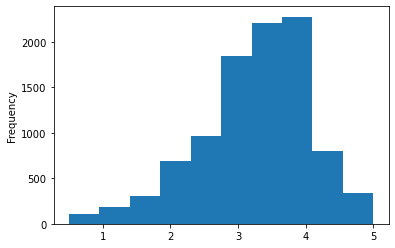

In [30]:
medias_por_filme.plot(kind='hist')

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

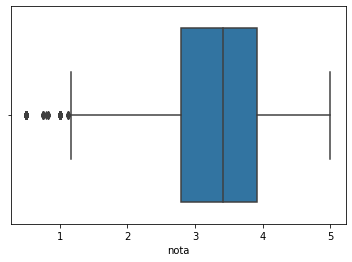

In [31]:
sns.boxplot(medias_por_filme)

In [32]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

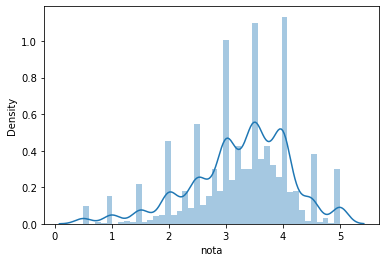

In [33]:
sns.distplot(medias_por_filme) # Gráfico de distribuição no seaborn

### utilizando a biblioteca matplotlib 

'\nManeira mais baixo nível sem utilizar nenhuma biblioteca para gerar gráficos, visto que\nas bibliotecas utilizam a matplotlib por baixo dos panos\n'

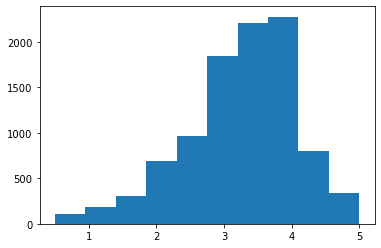

In [34]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme) # método para gerar histogramas
"""
Maneira mais baixo nível sem utilizar nenhuma biblioteca para gerar gráficos, visto que
as bibliotecas utilizam a matplotlib por baixo dos panos
""" 

Text(0.5, 1.0, 'Histograma das médias dos filmes')

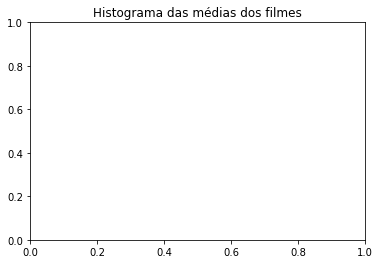

In [35]:
plt.title("Histograma das médias dos filmes") # Setando o titulo do gráfico

<AxesSubplot:ylabel='nota'>

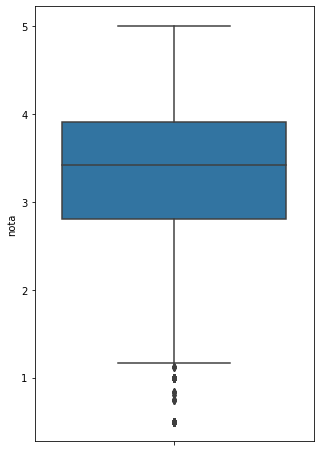

In [36]:
plt.figure(figsize=(5,8)) # É possível utilizar o pyplot para configurar os gráficos gerados no seaborn por exemplo
sns.boxplot(y=medias_por_filme) # É possível config o eixo do boxplot

### Parte 3

In [37]:
#Utilizando outro dataset - o TMDB do Kaggle

In [38]:
import pandas as pd

tmdb_path = "F:/Git/data-science/aprendizado/datasets/tmdb/tmdb_5000_movies.csv"
filmes = pd.read_csv(tmdb_path)

In [39]:
filmes.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [40]:
filmes.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [41]:
# tipos de variáveis: http://leg.ufpr.br/~silvia/CE055/node8.html

### Parte 4

In [42]:
filmes["original_language"].value_counts() # Número de aparições de filmes de cada língua
# Apesar de parecer que é um dataframe com duas colunas, a apresentação abaixo possui apenas uma que são os valores,
#porém são apresentados os index que são as siglas das línguas 

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
ar       2
cs       2
ro       2
id       2
el       1
vi       1
af       1
nb       1
xx       1
no       1
pl       1
ky       1
te       1
hu       1
sl       1
ps       1
tr       1
is       1
Name: original_language, dtype: int64

In [43]:
contagem_de_linguas = filmes["original_language"].value_counts().to_frame().reset_index()
# O método to_frame() apresenta em formato de tabela ainda com index e valor
# O método reset_index() transforma o index em coluna e cria uma indexação que nada mais é que um contador
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


<AxesSubplot:xlabel='original_language', ylabel='total'>

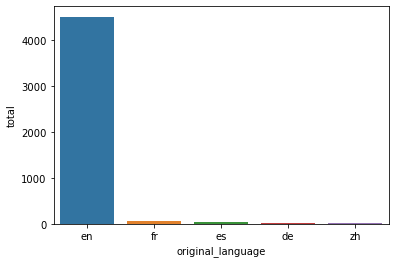

In [44]:
import seaborn as sns

sns.barplot(x="original_language", y="total", data=contagem_de_linguas.head())
# seaborn gera um gráfico de barras de um dataframe 

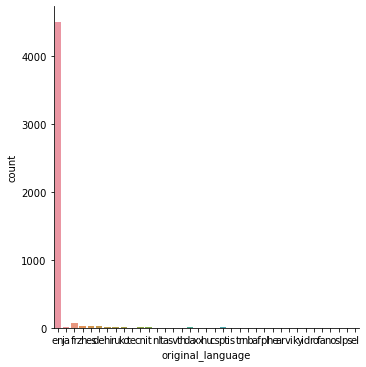

In [45]:
sns.catplot(x="original_language", kind="count", data=filmes)
# Com o seaborn é possível plotar um gráfico de uma maneira mais alto nível
# Através do catplot podemos dizer a coluna, o tipo de operação e a base de dados

([<matplotlib.patches.Wedge at 0x2c9f2e82070>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

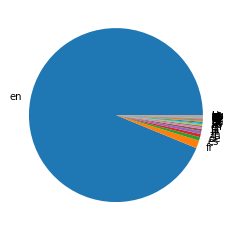

In [46]:
plt.pie(contagem_de_linguas["total"], labels = contagem_de_linguas["original_language"])

In [47]:
## Note que tanto o gráfico de barras, sobretudo o de pizza (ou torta, em inglês) não transmitem de uma maneira agradável uma mensagem
## assim, a data visualization é importantíssima quando se quer transmitir uma mensagem
## Obs: O pie chart não é muito recomendado na maioria das situações.

In [48]:
total_por_lingua = filmes["original_language"].value_counts()
total_geral = total_por_lingua.sum() # somatório das linguas
total_de_ingles = total_por_lingua.loc["en"] # método loc[] de location busca por um index específico
total_outras_linguas = total_geral - total_de_ingles
print(total_de_ingles, total_outras_linguas)

4505 298


In [49]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_outras_linguas]
}
dados = pd.DataFrame(dados) # sobreescrevendo a variável para já gerar um DataFrame dos valores
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

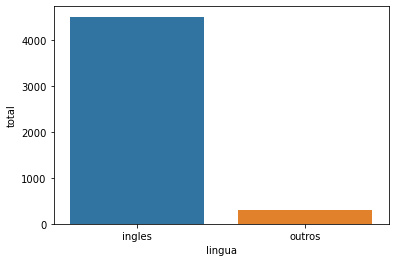

In [50]:
sns.barplot(x='lingua', y='total', data=dados)

In [51]:
## Note que agora a apresentação ficou bem mais clara para essa história que desejo contar
## Esse é só um exemplo como a data visualization é importante
## Agora, é possível ver a relação dos filmes em inglês com os de outras línguas

In [52]:
outras_linguas = filmes.query("original_language != 'en'")
total_por_lingua_de_outros_filmes = outras_linguas["original_language"].value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
cs     2
ta     2
id     2
ro     2
ar     2
ky     1
hu     1
ps     1
vi     1
no     1
te     1
sl     1
tr     1
is     1
xx     1
nb     1
af     1
pl     1
el     1
Name: original_language, dtype: int64

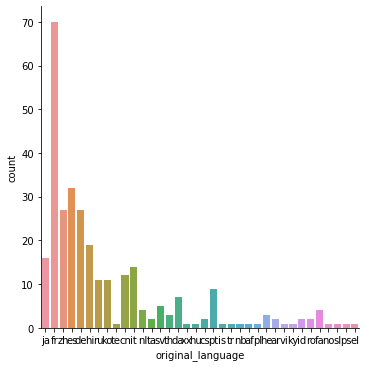

In [53]:
sns.catplot(x="original_language", kind="count", data=outras_linguas)

In [54]:
## O gráfico agora mostra a relação de quantidade por lingua exceto o inglês.
## Note que apesar de o gráfico fazer sentido, pode ser melhorado em sua apresentação

### Parte 5

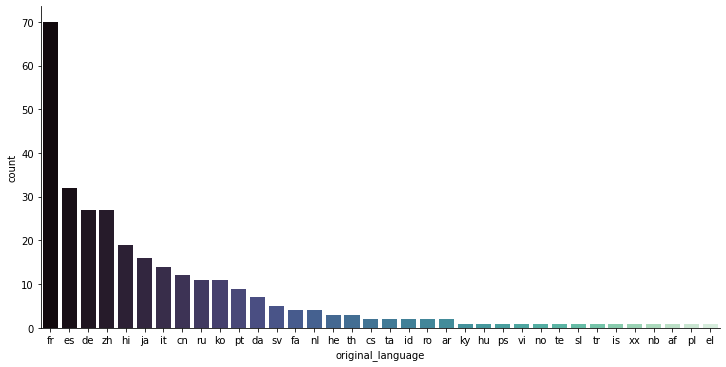

In [71]:
sns.catplot(x="original_language", 
            kind="count", 
            data=outras_linguas, 
            aspect=2,
            order=total_por_lingua_de_outros_filmes.index,
            palette="mako")
# Escolhendo o aspect 2 ele deixa a figura mais retangular
# Passando a ordem no eixo
# Mudando cor com o attr palette

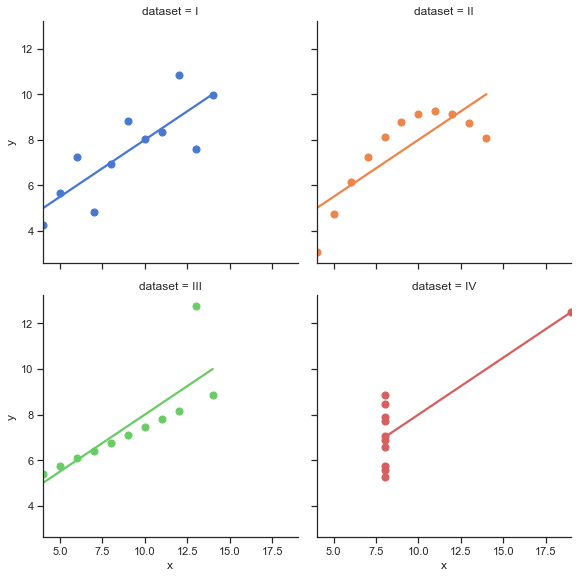

In [74]:
# Exemplo de gráfico de regressão linear
# O dataset utilizado já vem junto com o seaborn

import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### Parte 6

In [79]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [85]:
print("Nota média do Toy Story: %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji: %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


<AxesSubplot:xlabel='filmeId', ylabel='nota'>

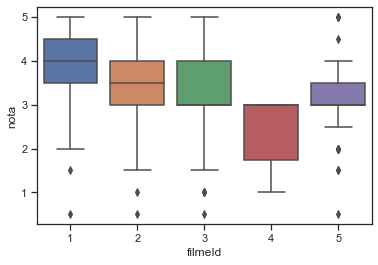

In [89]:
sns.boxplot(x="filmeId", y="nota", data=notas.query("filmeId in [1,2,3,4,5]"))

In [93]:
## utilizando desvio padrão (standard deviation)
print("Desvio padrão Jumanji %.2f" % notas_do_jumanji.nota.std())
print("Desvio padrão Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão Jumanji 0.88
Desvio padrão Toy Story 0.83


In [94]:
## Google Dataset Search
## Kaggle